<h1>Visualizing full-spectrum UV/Vis kinetics data</h1>
(<em>And some basic analysis</em>)

We begin by importing three modules into our data analysis environment:

<li><em>Pandas</em>: A clean, simple way to import and manipulate datafiles.</li>
<li><em>Matplotlib</em>: Fully customizable plotting package.</li>
<li><em>NumPy</em>: Python's main mathematics package.</li>

Note use of the word 'as' in the import statement: this gives the package a nickname that we can use rather than typing the entire name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
#This "Magic" makes all of our plots appear directly inside the ipython window.
#remove "inline" and execute this cell to make the plots appear in a new window.

In [3]:
ls #List all of the files in the current directory (folder)

DCWD0113.TXT*                        UV_kinetics_datavis_tutorial.ipynb
DCWkinetics.py                       UV_kinetics_iPy_tutorial.html
Doodle.xls                           tutorial_iPy_notebook_template.html
UV_kinetics_datavis_tutorial.html


All of the '.TXT' files are full-spectrum kinetics runs exported directly from the Agilent UV/Vis software. The first 5 lines of these files contain information about the instrument and the run, and the actual data begins on line 6 as tab-separated columns with headers. Let's import one of these files into our environment.

In [4]:
myData = pd.read_csv('DCWD0113.TXT', encoding='utf-16', skiprows=5, sep='\t')

myData is a Pandas DataFrame that contains all of our data. We can look at the first few rows (the head) of the datafile by adding '.head()' to the name:

In [5]:
myData.head()

,Time-WL,190,191,192,193,194,195,196,197,198,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
0,1.5,0.29086,0.04183,0.11578,0.56555,0.69891,0.55035,0.86087,0.62579,0.49582,...,-0.02687,0.01043,-0.01427,0.07400,-0.04395,0.06807,0.06448,-0.04258,0.06459,0.00232
1,62.1,0.55460,0.74814,0.32244,0.82480,0.64967,0.60883,0.64944,0.39732,0.71228,...,-0.02416,-0.00081,-0.02996,0.15796,-0.07208,0.03780,0.04682,-0.06295,0.06567,-0.10166
2,122.1,0.22640,0.94202,0.88133,0.56907,0.20118,0.75176,0.65741,0.21175,0.35303,...,0.01160,0.01446,-0.01269,-0.00313,0.02791,0.05347,0.13856,-0.08543,0.05566,-0.08731
3,182.1,0.56341,0.90073,0.84103,0.54658,0.45888,0.36111,0.46385,0.75130,0.99072,...,-0.02009,0.02726,-0.09491,0.05912,-0.00117,0.05364,0.04722,-0.01581,0.10973,-0.05876
4,242.1,0.62412,0.84497,0.49076,0.46402,0.72195,0.53990,0.87434,0.56402,0.31855,...,0.00966,-0.01874,0.07209,0.11550,0.00025,0.02857,0.11547,0.06840,-0.00034,-0.05864


Notice that the datafile is arranged with the wavelengths as columns and each measurement as a row. To make things easy on ourselves, we're going to transpose the datafile, i.e. switch columns to rows and rows to columns.

In [6]:
myData = myData.transpose()

Though I don't do it here, you can look at the data again to see how things are arranged by typing myData.head() again. Note that now our wavelengths are the indices in the far left column, and the measurement times are located in the first row. Since the wavelengths don't change between each measurement, let's pull all of them out as a separate array, 'WLs', for simplicity. We get the values of the index column by typing:
<li>"myData.index.values[1:]"</li>
We also specify that we want the values to be floats, rather than strings:
<li>".astype(float)"</li>

In [7]:
WLs = myData.index.values[1:].astype(float)

We can do the same thing for the measurement times by using 'iloc[[0]]' to get the first row.

In [8]:
time = myData.iloc[[0]].values[0]/60.0 #divide by 60 to change seconds to minutes

Now we can visualize the data! Let's look at all of the measurements at once using Matplotlib's default plot parameters.

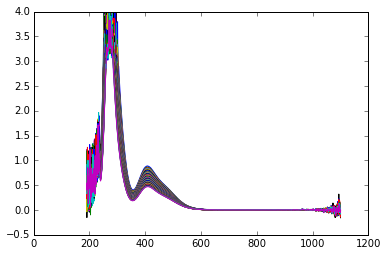

In [9]:
plt.figure() #open a new figure

for i in range(len(time)):
    plt.plot(WLs, myData[i][1:].values)

In the above cell, we created a loop that goes through every measurement time and plots the absorbance vs. wavelength data collected at that time. It's clear from this plot that we're only interested in the region between about 320nm and 650nm. We can narrow in on that region by defining specific axes, formatted as (xmin, xmax, ymin, ymax): 

<li>'plt.axis([320, 650, 0, 0.75])'</li>

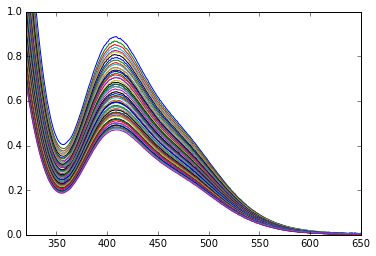

In [10]:
plt.figure()

x_min, x_max = 320, 650
y_min, y_max = 0, 1

plt.axis([x_min, x_max, y_min, y_max])
for i in range(len(time)):
    plt.plot(WLs, myData[i][1:].values)

We can add labels to the axes, create a color gradient to represent time, and add text to the figure by adding the following items to our cell:
<li>"cm = plt.get_cmap('RdBu')" cm is a colormap that goes from red (0) to blue (1). You can find many other colormaps in the matplotlib documentation online. (google it)</li>
<li>"plt.xlabel('Label text goes here')"</li>
<li>"plt.text(x,y, 'TEXT', color = cm(0))'</li>

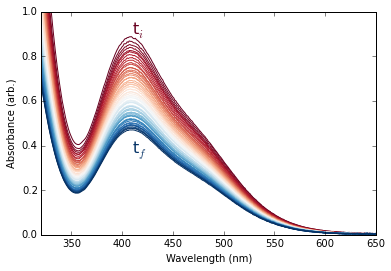

In [11]:
plt.figure()

x_min, x_max = 320, 650
y_min, y_max = 0, 1

wavelength_label, absorbance_label = 'Wavelength (nm)','Absorbance (arb.)'

plt.axis([x_min, x_max, y_min, y_max])

cm = plt.get_cmap('RdBu') # colormap

plt.xlabel(wavelength_label) # X axis label
plt.ylabel(absorbance_label) # Y axis label

plt.text(410, 0.9, 't$_i$', color=cm(0), size=16) # figure text
plt.text(410, 0.37, 't$_f$', color=cm(0.99), size=16) # figure text

for i in range(len(time)): # loop through all measurements
    color_N = cm(time[i]/time[-1]) # choose color based on time of measurement
    absorbances = myData[i][1:].values # get the absorbance readings
    plt.plot(WLs, absorbances, color=color_N) # plot the spectrum at each time

We can compute the concentration at each timepoint by simply looking at the absorbance value at the top of the peak. In order to find the exact wavelength at which this peak occurs in our data, we'll use the 'argwhere' and 'argmax' functions built into NumPy to search for a local maximum.

In [12]:
START_WL, END_WL = 350.0, 500.0

START_INDEX = np.argwhere(WLs>START_WL)[0][0] #lowest wavelength to search for maximum
END_INDEX = np.argwhere(WLs>END_WL)[0][0] #highest wavelength to search for maximum

PEAK_INDEX = np.argmax(myData[1][START_INDEX:END_INDEX].values)+START_INDEX

Now we can compute the concentration at each timepoint by dividing the observed absorbance by the molar absorptivity (I set this to 1.0, just for fun).

In [13]:
molar_absorptivity = 1.0
X_conc = (myData.iloc[[PEAK_INDEX]].values[0])/molar_absorptivity

Let's look at plots of concentration vs. time, ln(concentration) vs. time, and inverse concentration vs. time:

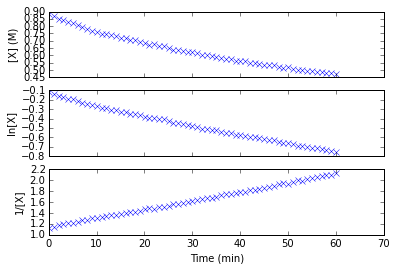

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

#f.subplots_adjust(hspace=0) #enable this to force the x axes to touch

ax1.plot(time, X_conc, 'x')
ax2.plot(time, np.log(X_conc), 'x')
ax3.plot(time, 1/(X_conc), 'x')

ax3.set_xlabel('Time (min)')
ax1.set_ylabel('[X] (M)')
ax2.set_ylabel('ln[X]')
ax3.set_ylabel('1/[X]')

To determine the reaction order and extract a rate constant, we need to fit a line to the data in each pane. We will do this using SciPy:

In [15]:
from scipy import stats

We'll now fit a line to the data in each pane above and see which one fits better. This will tell us if the reaction we're studying is zero, first, or second order (in a crude sense...)

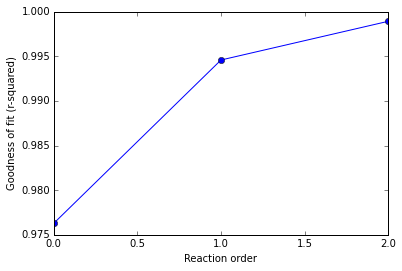

In [16]:
"""find optimal slope and intercept for concentration vs. time (zero order plot)"""
slope0, intercept0, r_value0, p_value0, std_err0 = stats.linregress(time, X_conc)

"""find optimal slope and intercept for ln(concentration) vs. time (first-order plot)"""
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(time, np.log(X_conc))

"""find optimal slope and intercept for 1/concentration vs. time (second-order plot)"""
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(time, 1.0/X_conc)

#Plot goodness of fit as a function of reaction order
plt.figure()
plt.plot([0,1,2],[r_value0**2, r_value1**2, r_value2**2], 'o-')
plt.xlabel('Reaction order')
plt.ylabel('Goodness of fit (r-squared)')

r-squared is closest to 1 for the third fit, so a second-order model gives the best fit the data.

Finally, let's plot the data, our optimal fits, and the errors in the fits, and also print out the rate constants.

In [17]:
def linear(x, a, b):
    """A linear function of three variables:
        x: independent variable
        a: slope
        b: intercept"""
    return a*x + b

The calculated rate constant is -0.006478 M/min


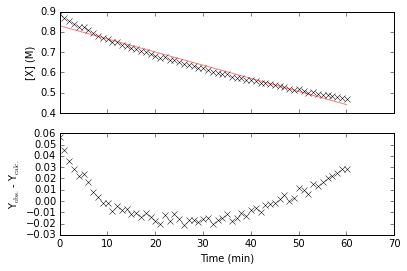

In [18]:
f, (ax1, ax2) = plt.subplots(2, sharex=True)

x, yobs, ycalc = time, X_conc, linear(time, slope0, intercept0)

ax1.plot(x, yobs, 'x', color='black') #plot data
ax1.plot(x, ycalc, color='red', alpha=0.5) #plot line of best fit

ax2.plot(x, yobs-ycalc, 'x', color='black') #plot errors in fit

ax2.set_xlabel('Time (min)')
ax1.set_ylabel('[X] (M)')
ax2.set_ylabel(r'Y$_{\rm obs.}$ - Y$_{\rm calc.}$')

print(r'The calculated rate constant is %f M/min' % (slope0))

The calculated rate constant is -0.010143 1/min


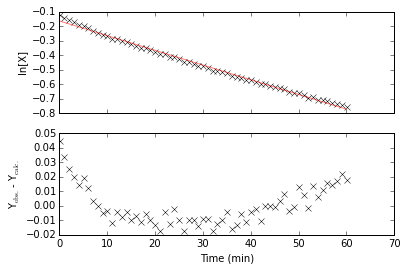

In [19]:
f, (ax1, ax2) = plt.subplots(2, sharex=True)

x, yobs, ycalc = time, np.log(X_conc), linear(time, slope1, intercept1)

ax1.plot(x, yobs, 'x', color='black') #plot data
ax1.plot(x, ycalc, color='red', alpha=0.5) #plot line of best fit

ax2.plot(x, yobs-ycalc, 'x', color='black') #plot errors in fit

ax2.set_xlabel('Time (min)')
ax1.set_ylabel('ln[X]')
ax2.set_ylabel(r'Y$_{\rm obs.}$ - Y$_{\rm calc.}$')

print(r'The calculated rate constant is %f 1/min' % (slope1))

The calculated rate constant is 0.016199 1/(M*min)


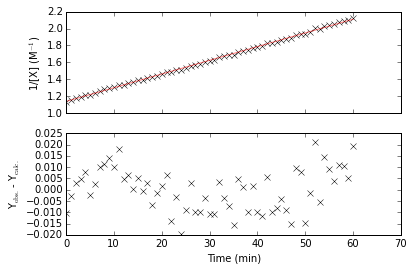

In [20]:
f, (ax1, ax2) = plt.subplots(2, sharex=True)

x, yobs, ycalc = time, 1/X_conc, linear(time, slope2, intercept2)

ax1.plot(x, yobs, 'x', color='black') #plot data
ax1.plot(x, ycalc, color='red', alpha=0.5) #plot line of best fit

ax2.plot(time, yobs-ycalc, 'x', color='black') #plot errors in fit

ax2.set_xlabel('Time (min)')
ax1.set_ylabel('1/[X] (M$^{-1}$)')
ax2.set_ylabel(r'Y$_{\rm obs.}$ - Y$_{\rm calc.}$')

print(r'The calculated rate constant is %f 1/(M*min)' % (slope2))

The fact that the errors in the final plot are more or less uniformly distributed around y = 0 gives us further evidence that a second-order plot is most descriptive of the data.